#RESTAURANT REVENUE PREDICTION

#Introduction



##Project Overview

This project is one project in Kaggle which help TFI deciding when and where to open new restaurants. We choose this project is beacuse it is more pratical in a real business. We want to know how the different models we learn perform in this real case and practice what we learned from the course. We choose 5 models for it: Random Forest Regressor, KNN Regressor, Lasso, Ridge and XGB Regressor. Four of them we learned from the class, and one is new to us. We will use them to compare the data results and try to figure out which variables are the most important for forecasting revenue and provide an overview of our best performing models by root mean sqaure error.

##Data Description

We’ll train our model with a data set which has 43 variables and 137 transactions record, which is small size. As describe in the data set, revenue is the response variable and it’s indicates revenue of the restaurant in a given year. The values are transformed so they don’t mean real dollar values. In the remaining variables,P1-P37 are anonymized data and we have 4 categorical vairables and one date vairable which we need convert later.

#**Starter Code**

##Loading Package

In [1216]:
# General
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [1217]:
# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

##Loading Data

In [1218]:
df= pd.read_csv('/content/RestaurantRevenue.csv') 

#**Data Pre-processing**

##Data Overview

In [1219]:
df.shape

(137, 43)

In [1220]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [1221]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [1222]:
df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [1223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

As we can see, there is no missing value in the dataset. We don't need to use the feature 'ID' as it's reduant and not going to give any insight of the revenue. So we will simply drop it later. Features 'Open date','City', 'City Group' and 'Type' are object type which need to be converted into machine-readable type later. 

##Data Analysis & Preprocessing

###Target Column - 'revenue'


Check the target column distribution ['revenue']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


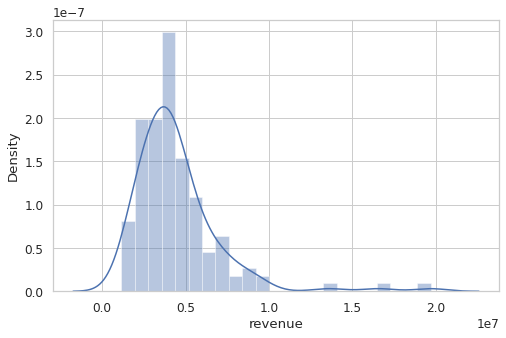

In [1224]:
sns.distplot(df.revenue)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


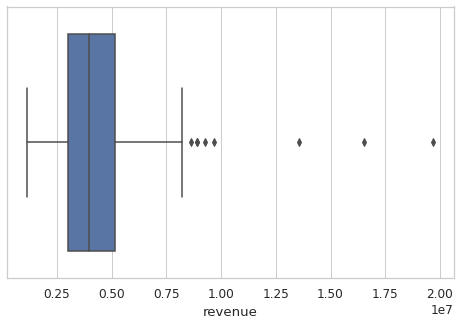

In [1225]:
sns.boxplot(df.revenue)

From the above plots, we can see the revenue is drawn from a normal distribution(with a little bit skew) and there are some outliers in revenue. So we want to drop some outliers here.

In [1226]:
df = df[df['revenue']<8e+06].copy()
df.shape

(128, 43)

###Remove unnecessery column - 'ID'

In [1227]:
df=df.drop('Id',axis=1)

###Numerical Features

In [1228]:
numerical_features = df.select_dtypes([np.number]).columns.tolist()

In [1229]:
numerical_features

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'revenue']

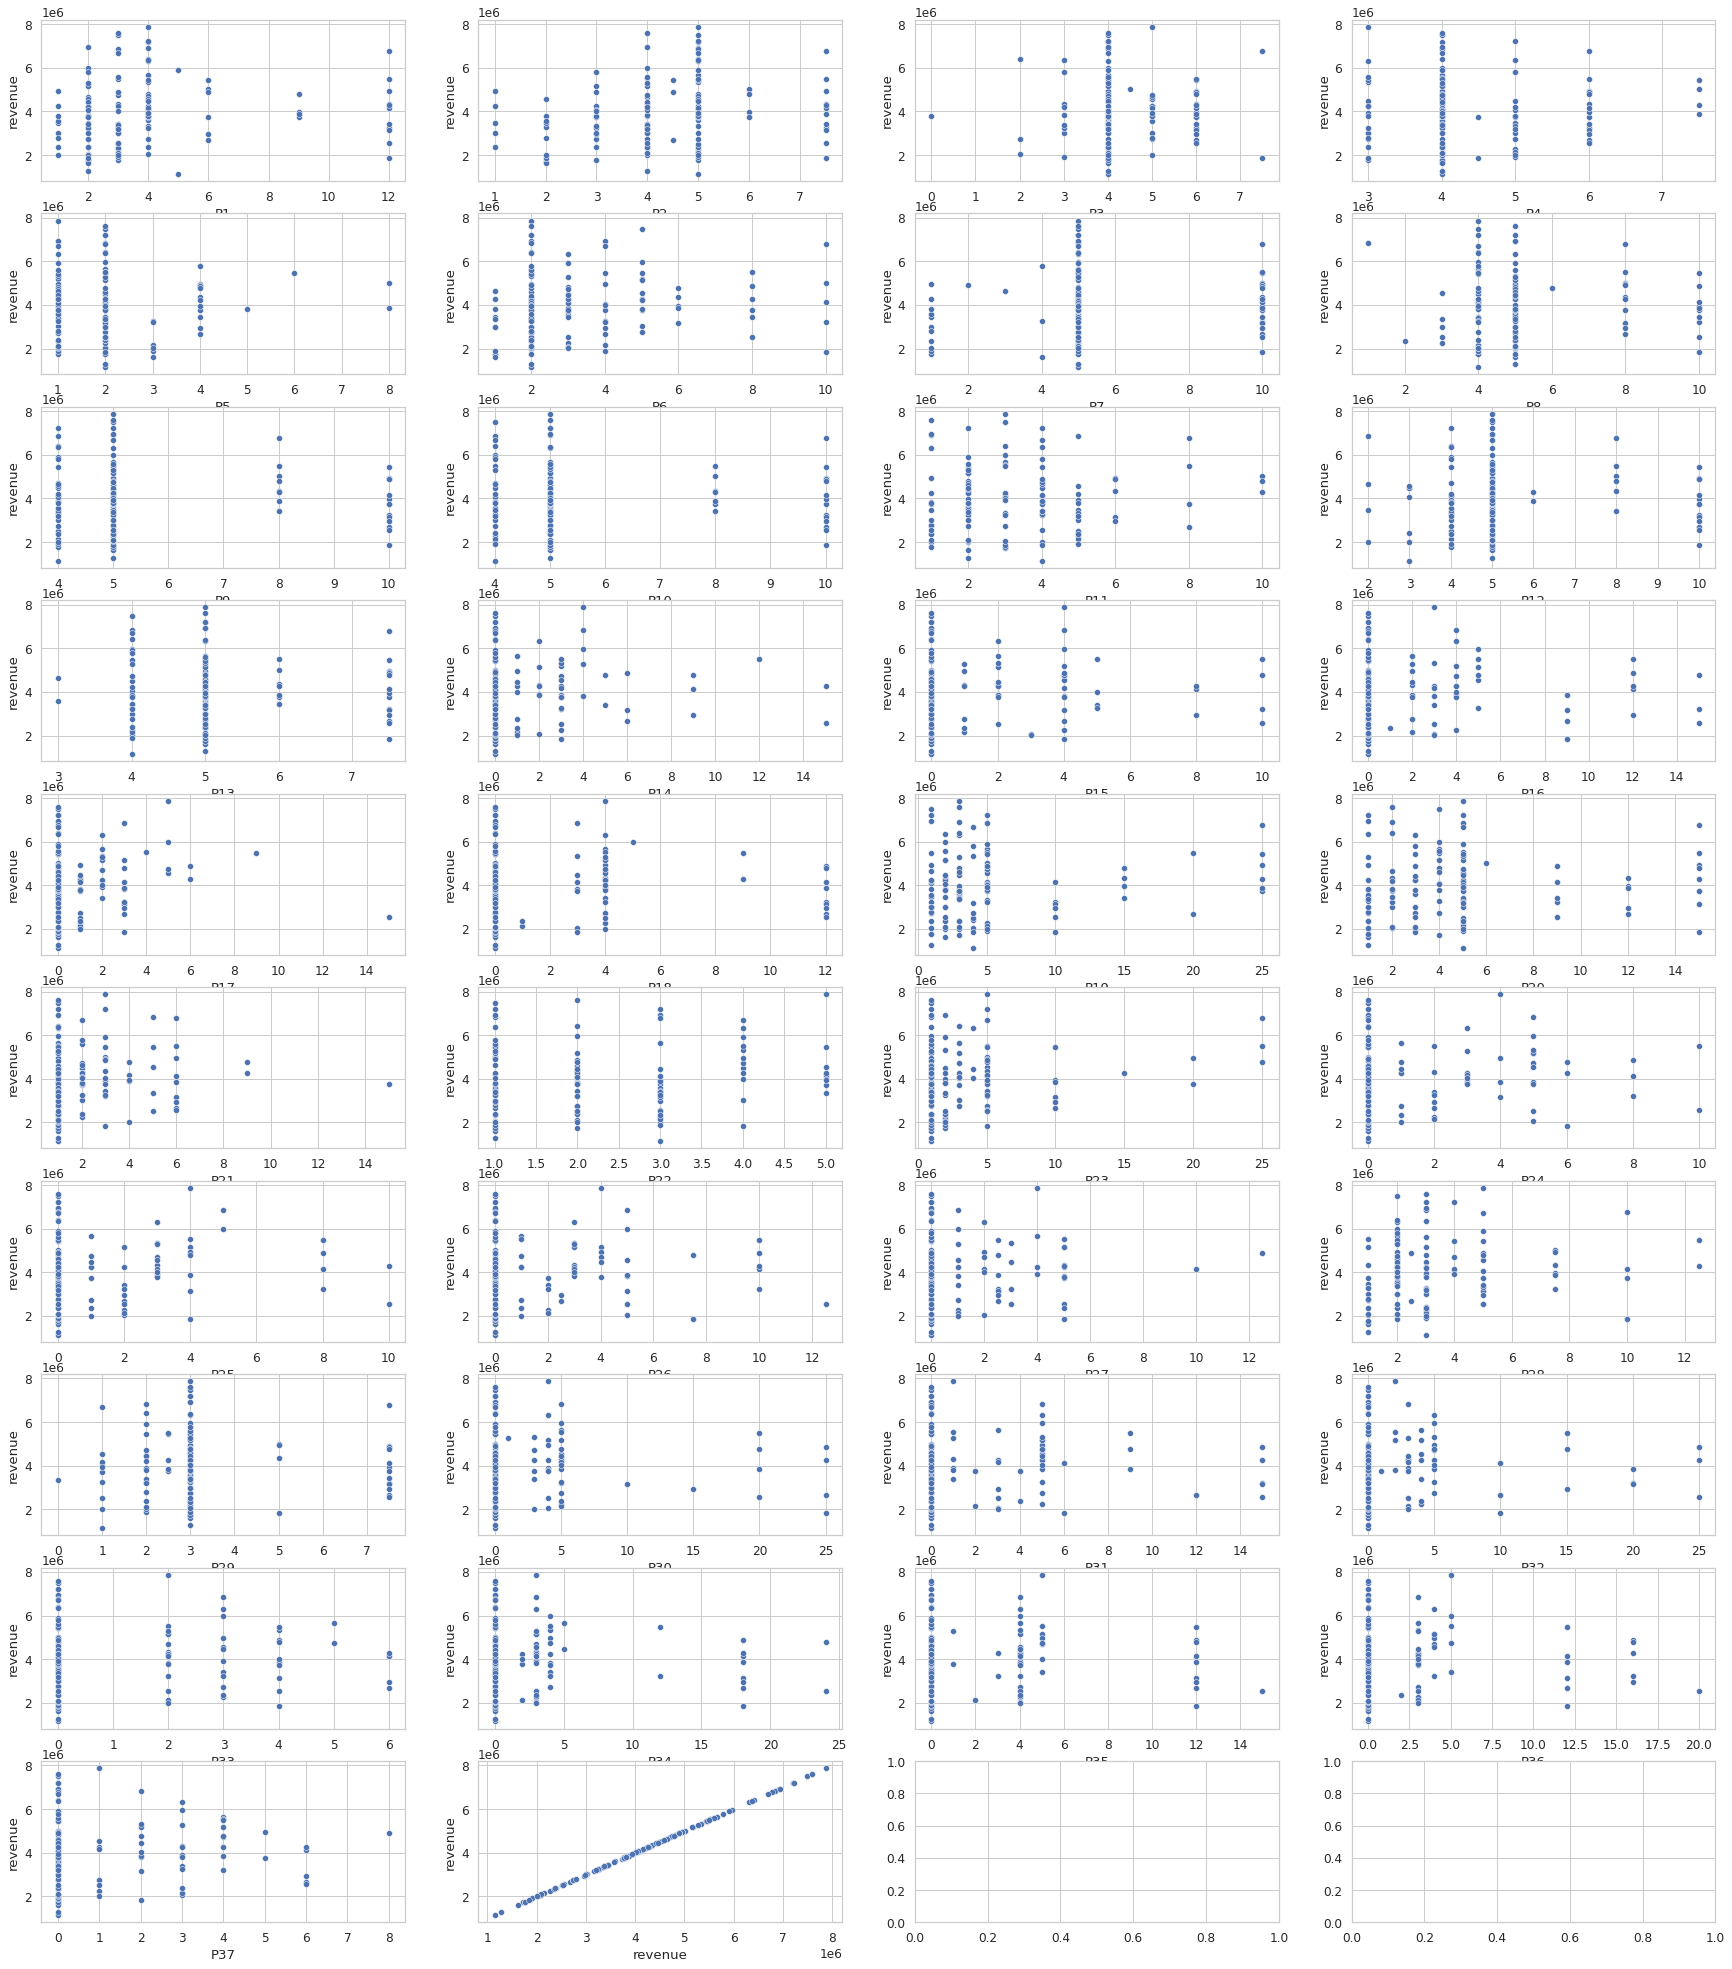

In [1230]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.scatterplot(x=df[variable], y=df['revenue'], ax=subplot)

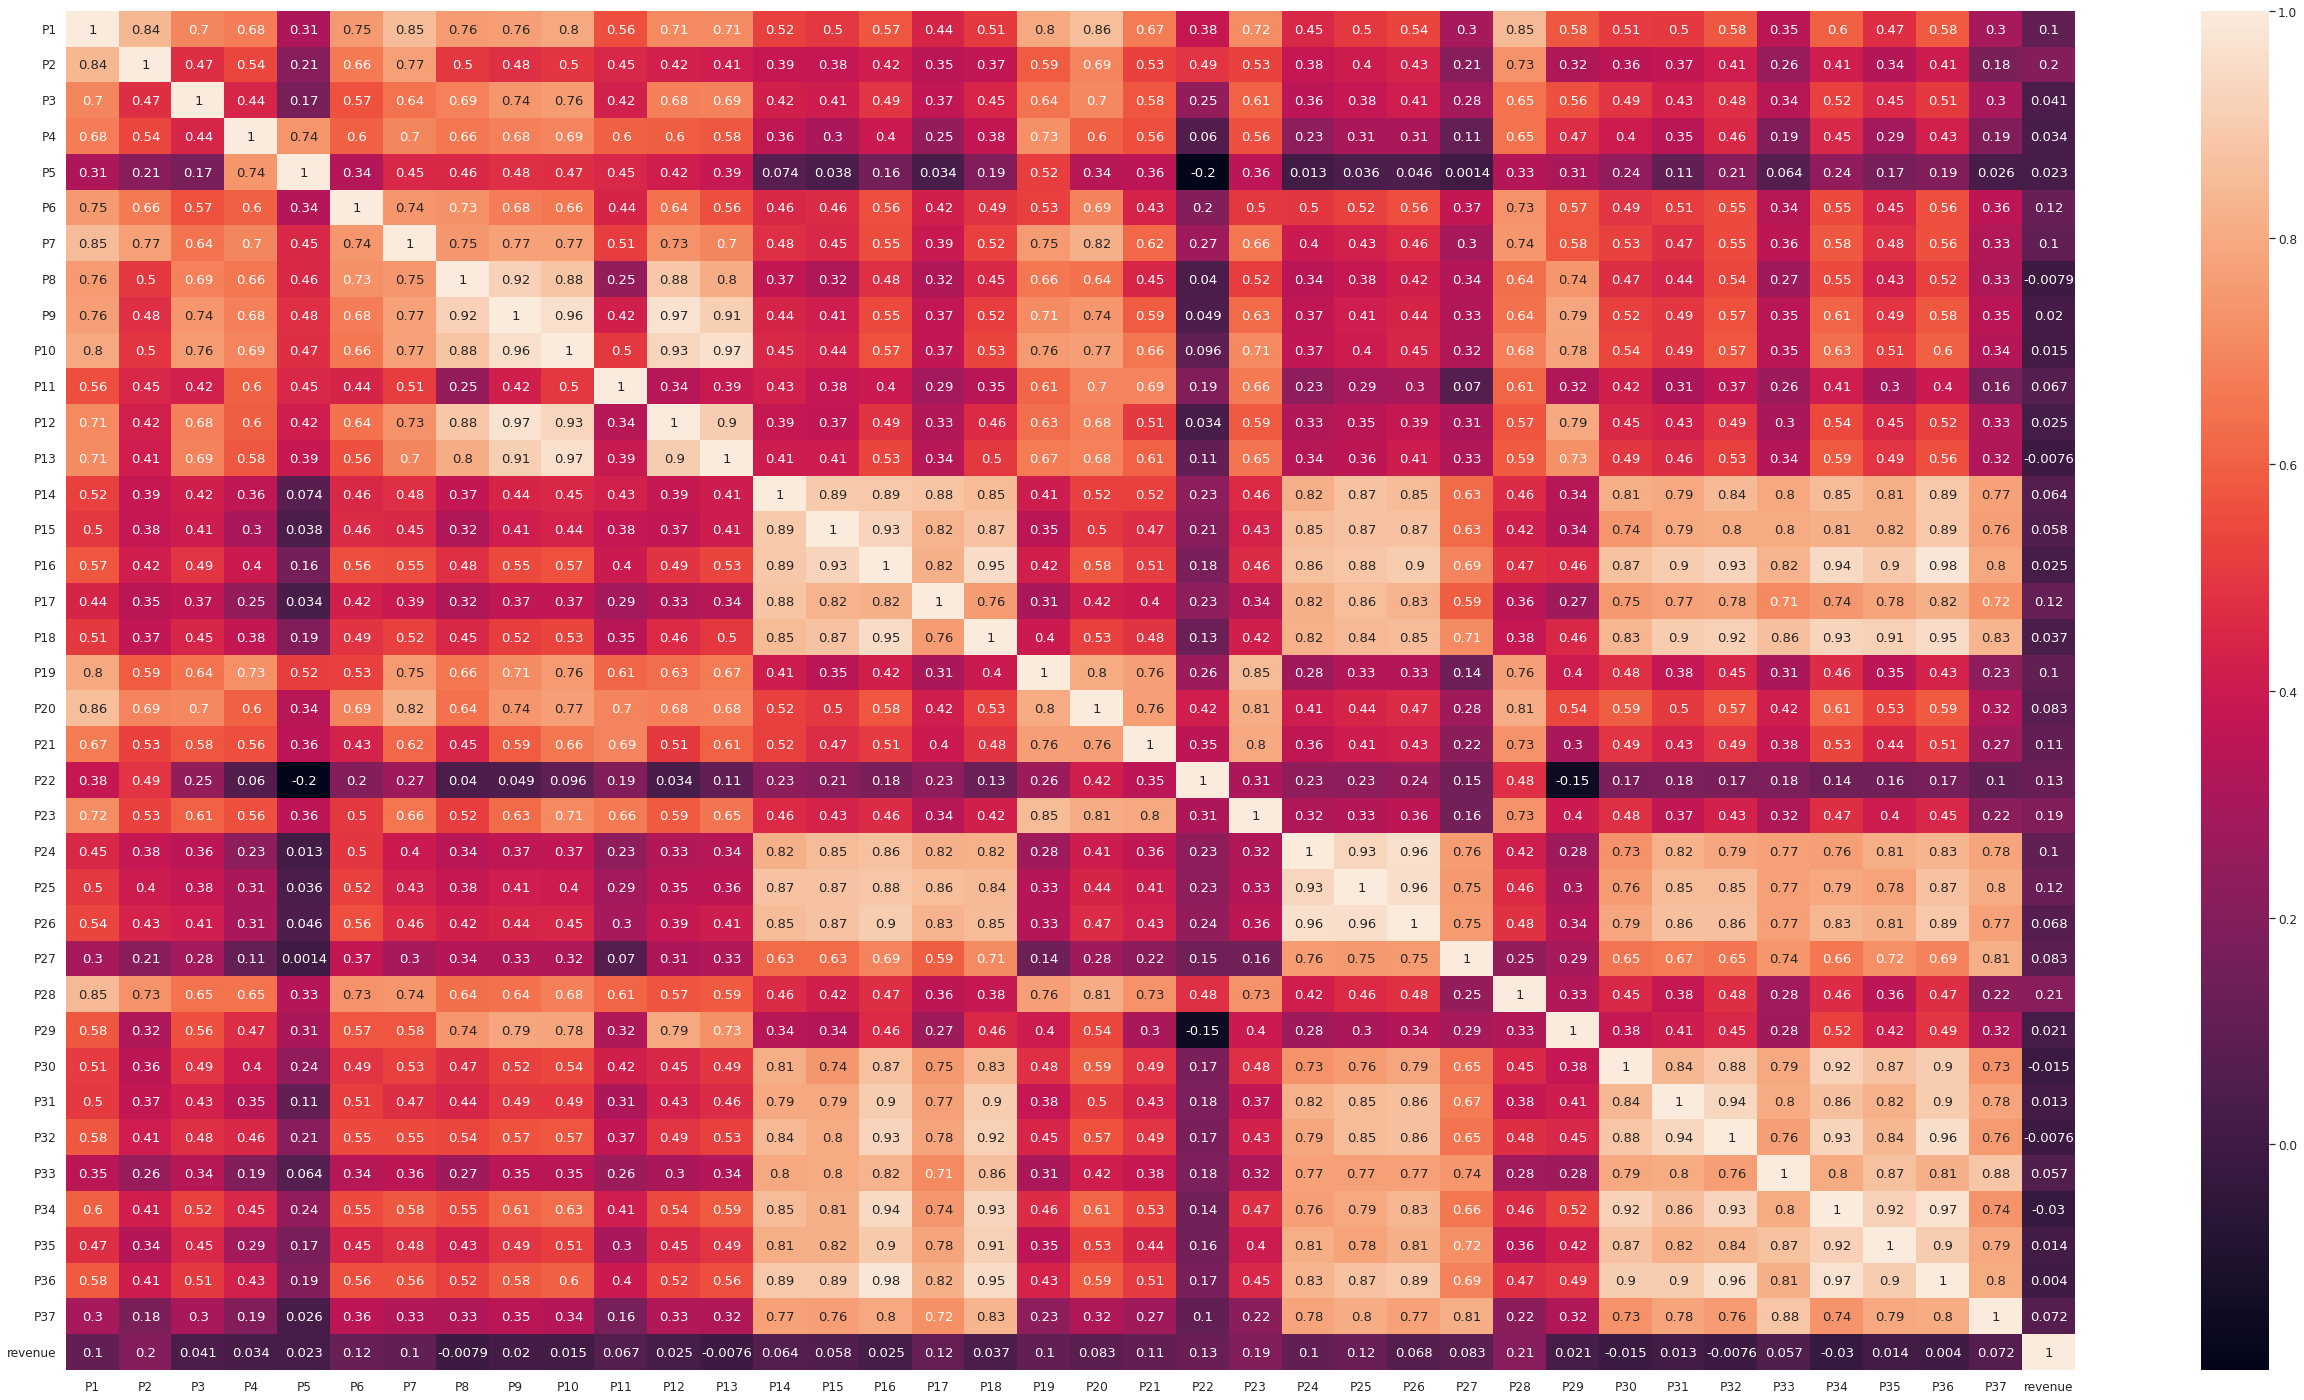

In [1231]:
plt.figure(figsize=(45,25))
sns.heatmap(df.corr(),annot=True)

As the sctter plot and corrleation matrix above, there is no obvious
corrleation in numerical features

###Date Features

Date does not give us any insight of the revenue. However we can extract month and year from date to see if there is relationship between them with revenue. First we convert the 'Open Date' feature in datetime format and then we extract the month and year from it to see how is the distribution of them.

In [1232]:
df['Open Date']=pd.to_datetime(df['Open Date'])
df['Month']=[x.month for x in df['Open Date']]
df['Year']=[x.year for x in df['Open Date']]


In [1233]:
df=df.drop(['Open Date'],axis=1)
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,revenue,Month,Year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Ankara,Big Cities,FC,3,4.0,4.0,5.0,3,4,5,...,0,0,0,0,0,0,0,3199619.0,11,2002
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,...,0,0,0,0,0,0,0,5787594.0,6,2008
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,...,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,...,0,0,0,0,0,0,0,7217634.0,10,2010


Now let's try to visualize the trends in month and year to understand how they affect the revenue

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


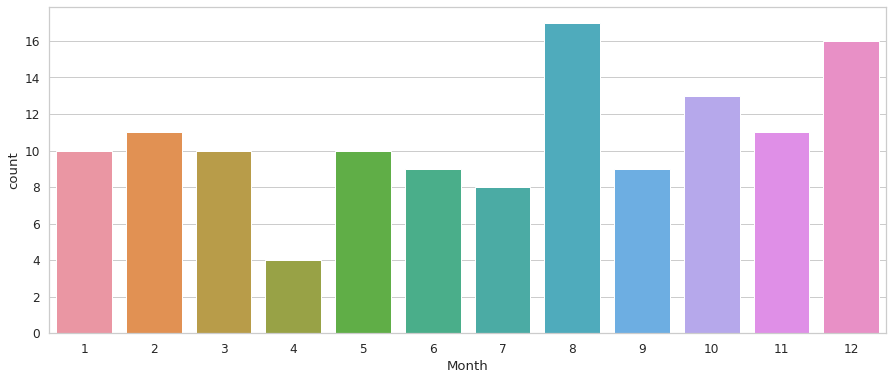

In [1234]:
plt.figure(figsize=(15,6))
sns.countplot(df['Month'])

From the above plot we can look at the occurence of various months in the dataset. We have the most data for the last 5 months. The highest of them is from August and December. Now let's see in which month did we have the most revenue.

In [1235]:
df.groupby('Month')['revenue'].mean()

Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

From here we can see that the month January gave the most revenue to the restraunts. September and October followed January.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


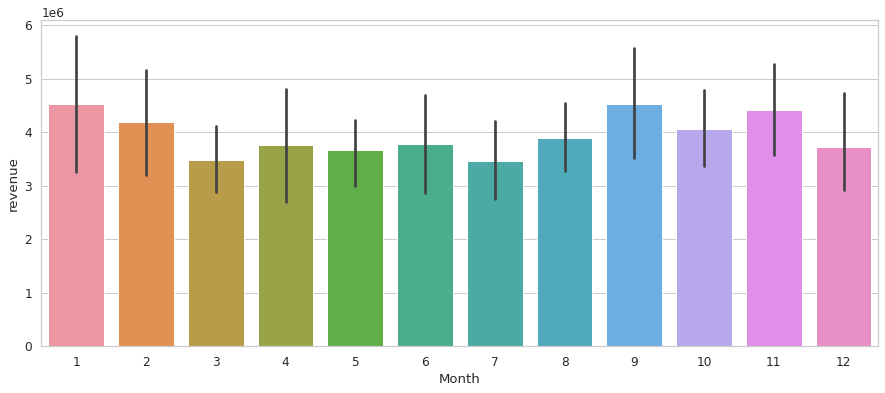

In [1236]:
plt.figure(figsize=(15,6))
sns.barplot('Month','revenue',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


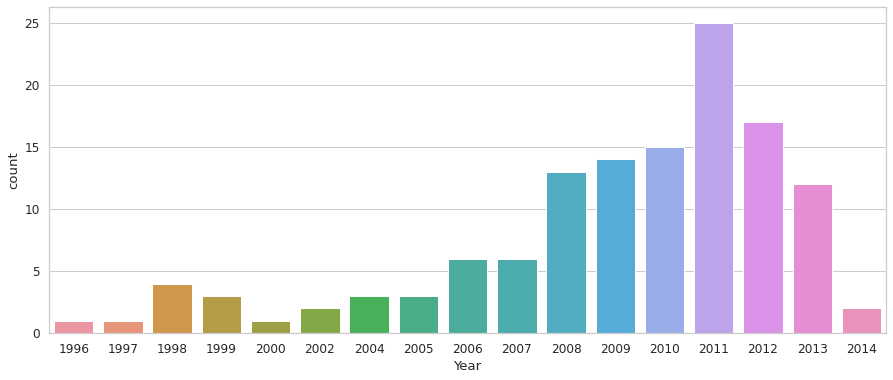

In [1237]:
plt.figure(figsize=(15,6))
sns.countplot(df['Year'])

From here we can see that the most of the data is from the years 2008-2013. Out of them the most of the data is from the year 2011. The other years are contruibuting really less on the basis of number of data. This is also going to affect the results as well.

In [1238]:
df.groupby('Year')['revenue'].mean()

Year
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2002    4.991022e+06
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


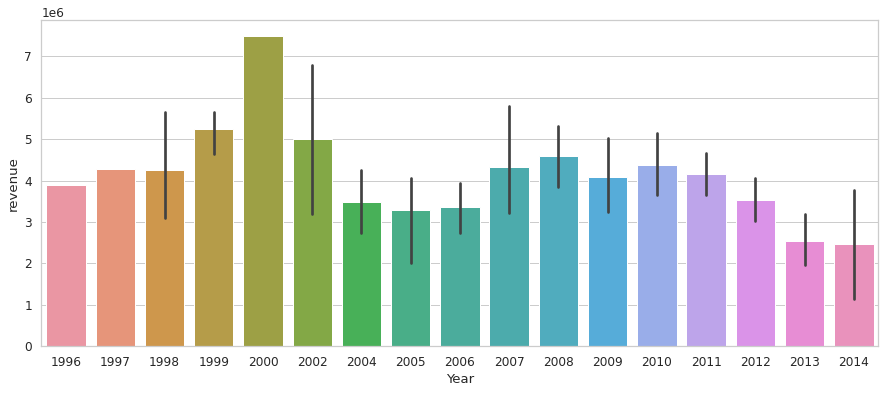

In [1239]:
plt.figure(figsize=(15,6))
sns.barplot('Year','revenue',data=df)

Out of all the years, the highest revenue was generated in the year 2000.

Encode 'Year'

In [1240]:
le=LabelEncoder()
df['Year']=le.fit_transform(df['Year'])
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,revenue,Month,Year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3,4,5,5,4,3,4,5653753.0,7,3
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,6923131.0,2,10
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,2055379.0,3,15
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,12,10,6,18,12,12,6,2675511.0,2,14
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,1,3,2,3,4,3,3,4316715.0,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Ankara,Big Cities,FC,3,4.0,4.0,5.0,3,4,5,...,0,0,0,0,0,0,0,3199619.0,11,5
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,...,0,0,0,0,0,0,0,5787594.0,6,10
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,...,0,0,0,0,0,0,0,2544857.0,7,8
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,...,0,0,0,0,0,0,0,7217634.0,10,12


###Categorical Features

using categorical features to visualization and get insights of data

In [1241]:
df['City Group'].value_counts()

Big Cities    69
Other         59
Name: City Group, dtype: int64

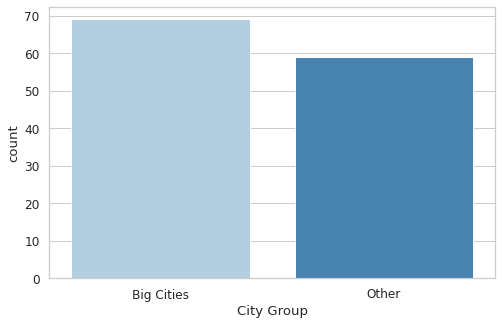

In [1242]:
sns.countplot(data=df, x="City Group", palette="Blues")

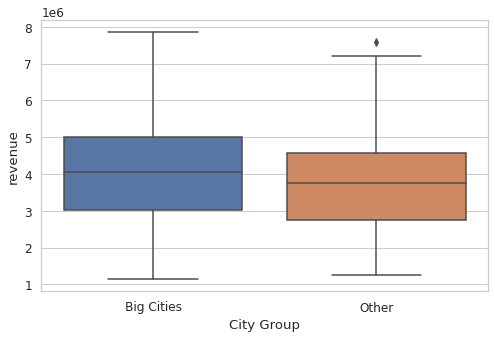

In [1243]:
sns.boxplot(x="City Group", y='revenue', data=df)

In [1244]:
df['Type'].value_counts()

FC    69
IL    58
DT     1
Name: Type, dtype: int64

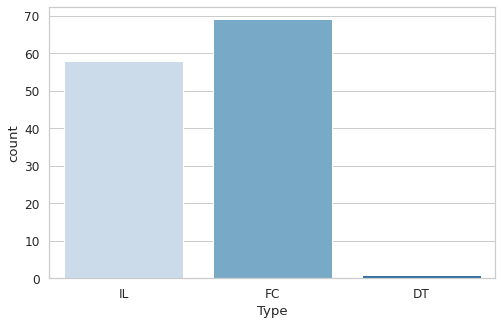

In [1245]:
sns.countplot(data=df, x="Type", palette="Blues")

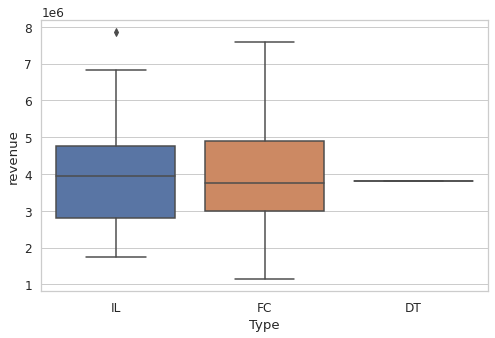

In [1246]:
sns.boxplot(x="Type", y='revenue', data=df)

In [1247]:
df['City'].value_counts()

İstanbul          43
Ankara            19
İzmir              7
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: City, dtype: int64

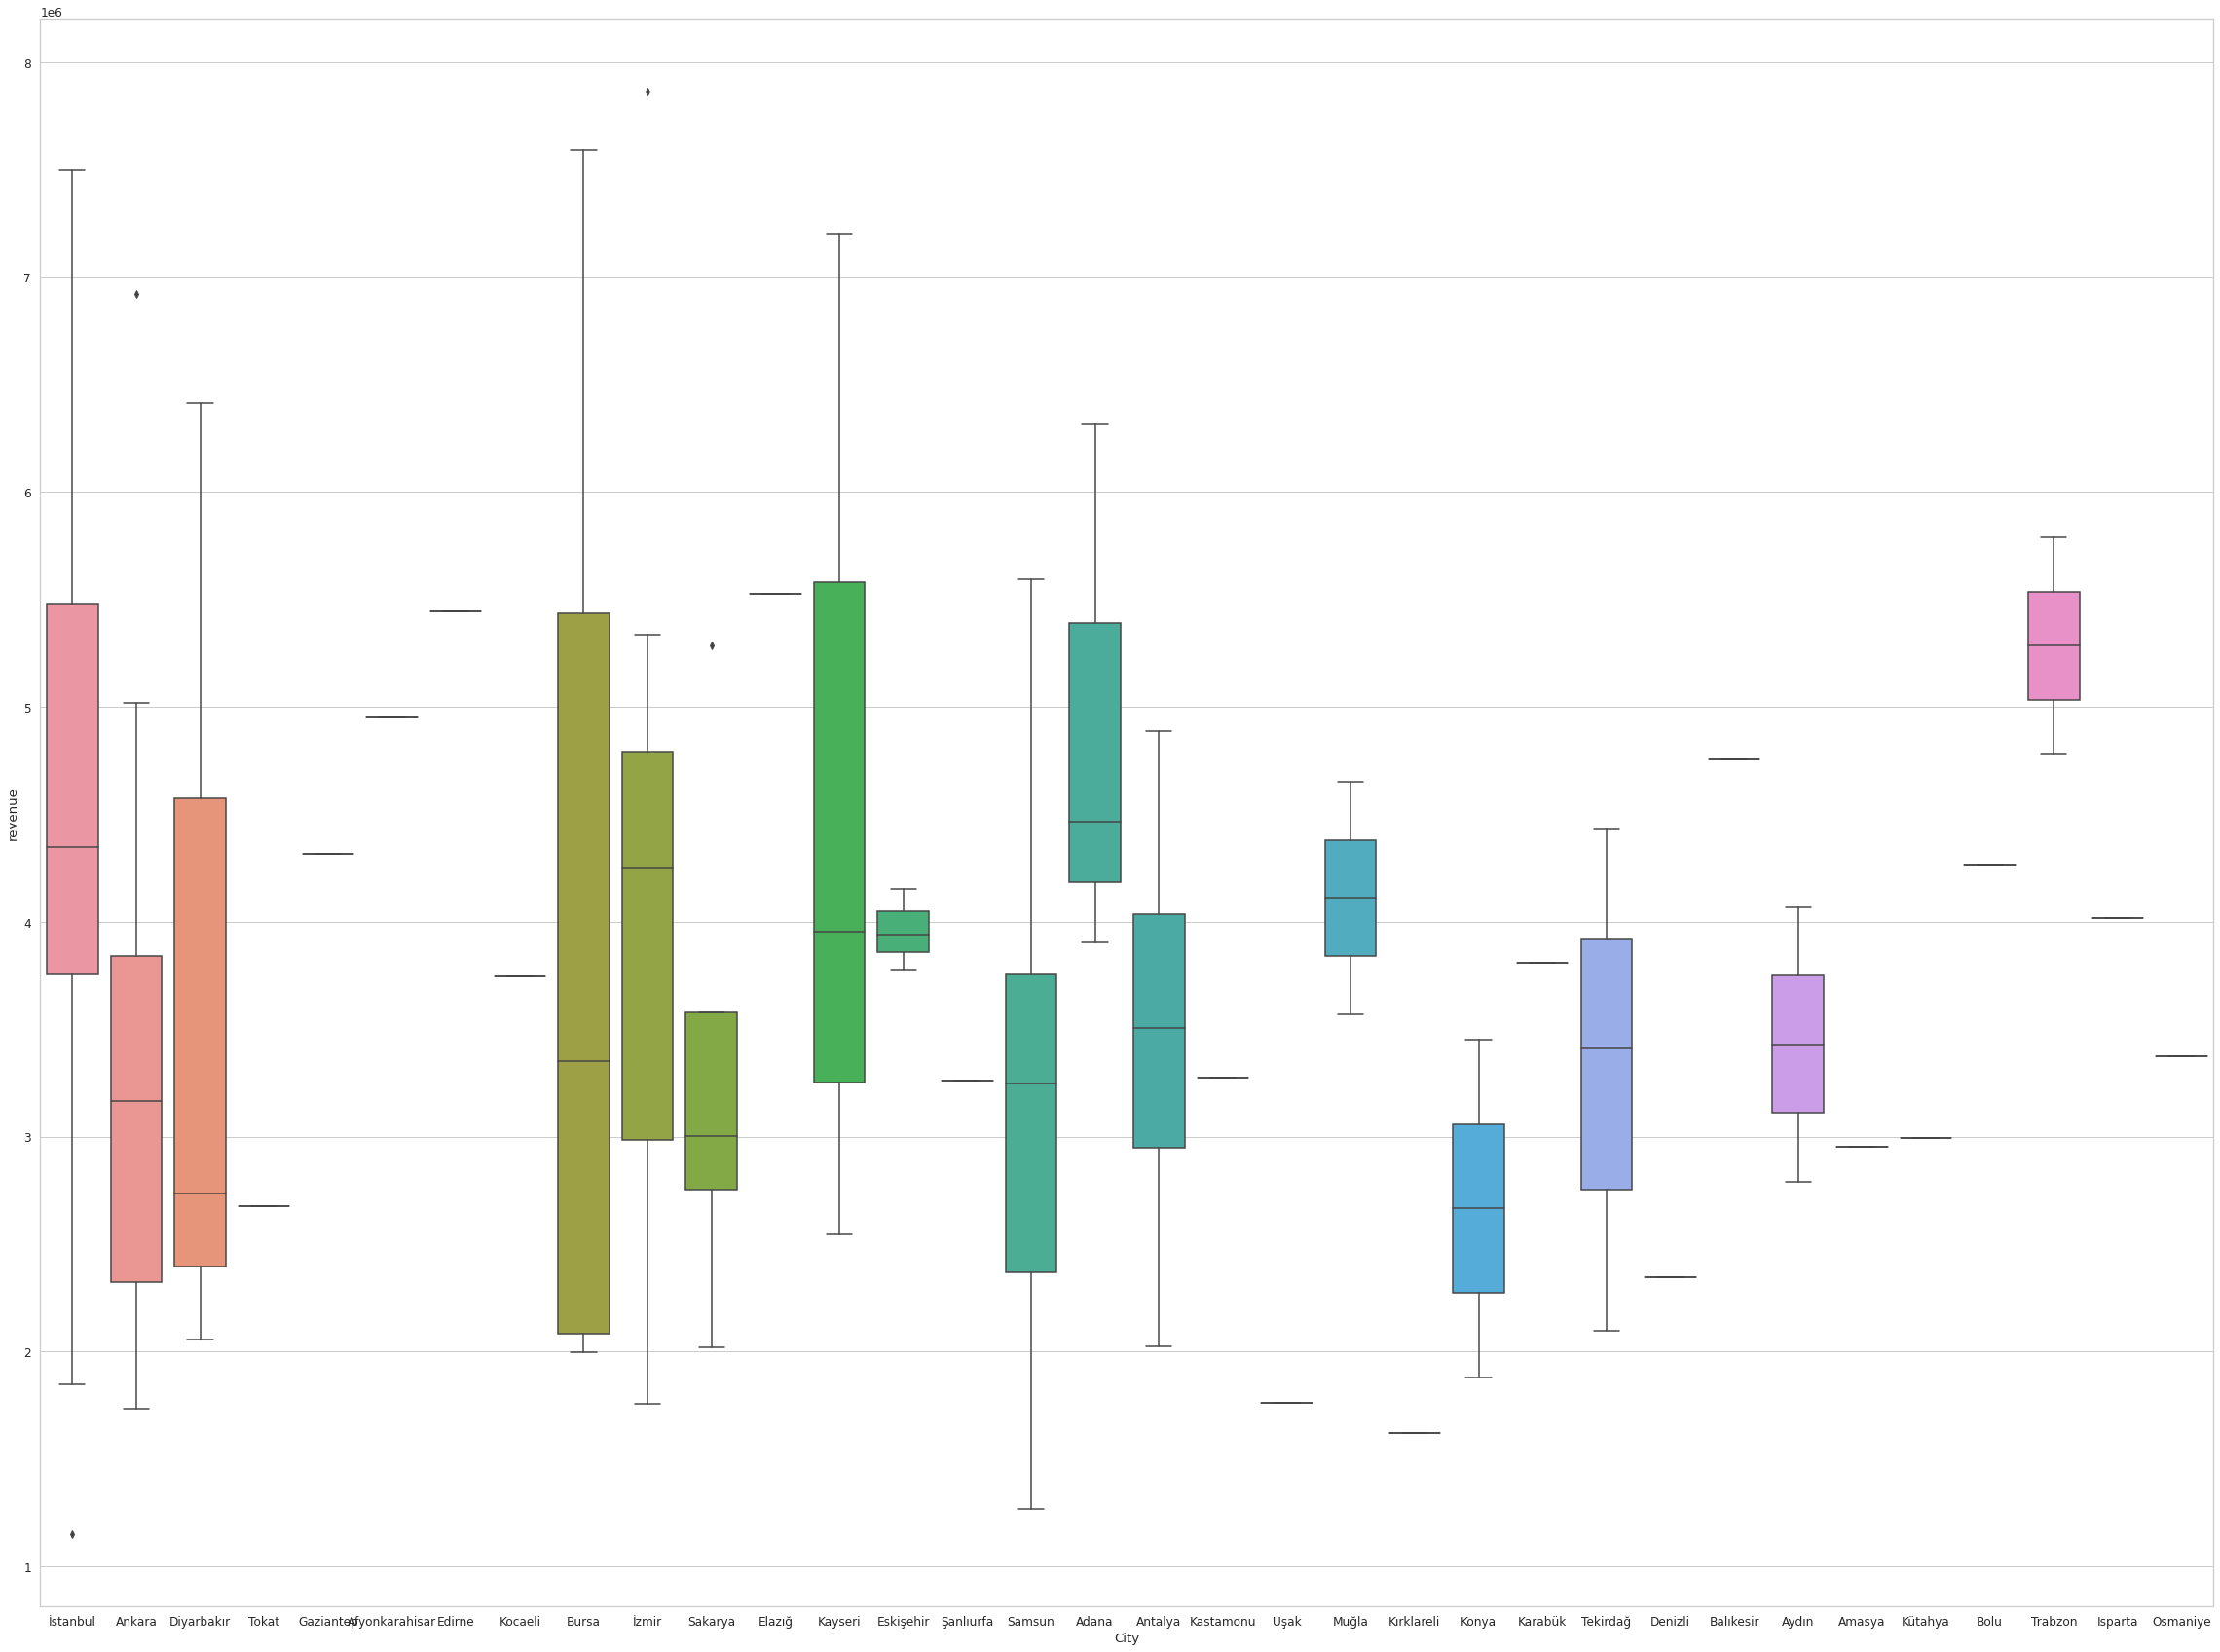

In [1248]:
fig, ax = plt.subplots(1, 1, figsize=(40, 30))
sns.boxplot(x='City', y='revenue', data=df)

There are 63 different City values. I'd like to dropping it since there are too many factors and don't give much information of revenue. Besides, the 'City Group' feature can provide the effect of city as well. 

In [1249]:
df=df.drop('City',axis=1)
df

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,revenue,Month,Year
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,5653753.0,7,3
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,6923131.0,2,10
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,2055379.0,3,15
3,Other,IL,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,2675511.0,2,14
4,Other,IL,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,4316715.0,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Big Cities,FC,3,4.0,4.0,5.0,3,4,5,4,...,0,0,0,0,0,0,0,3199619.0,11,5
132,Other,FC,2,3.0,3.0,5.0,4,2,4,4,...,0,0,0,0,0,0,0,5787594.0,6,10
134,Other,FC,3,4.0,4.0,4.0,2,3,5,5,...,0,0,0,0,0,0,0,2544857.0,7,8
135,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,...,0,0,0,0,0,0,0,7217634.0,10,12


Encode categorical features



In [1250]:
le=LabelEncoder()

In [1251]:
df['Type']=le.fit_transform(df['Type'])
df['City Group']=le.fit_transform(df['City Group'])
df

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,revenue,Month,Year
0,0,2,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,5653753.0,7,3
1,0,1,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,6923131.0,2,10
2,1,2,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,2055379.0,3,15
3,1,2,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,2675511.0,2,14
4,1,2,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,4316715.0,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,1,3,4.0,4.0,5.0,3,4,5,4,...,0,0,0,0,0,0,0,3199619.0,11,5
132,1,1,2,3.0,3.0,5.0,4,2,4,4,...,0,0,0,0,0,0,0,5787594.0,6,10
134,1,1,3,4.0,4.0,4.0,2,3,5,5,...,0,0,0,0,0,0,0,2544857.0,7,8
135,0,1,4,5.0,4.0,5.0,2,2,5,5,...,0,0,0,0,0,0,0,7217634.0,10,12


##Feature Importance

In [1252]:
#Calculate F Score using XGB Regressor
x=df.drop('revenue',axis=1)
y=df['revenue']
xgb = XGBRegressor()
xgb.fit(x, y)

print(xgb.feature_importances_)

[18:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.00708976 0.01428882 0.02925263 0.06052972 0.01370331 0.02690866
 0.0213252  0.03048534 0.01736989 0.03011752 0.02946245 0.03599986
 0.0188325  0.02320181 0.         0.03103615 0.01944258 0.03070349
 0.02771336 0.01535809 0.02319274 0.03076216 0.02468628 0.02872329
 0.0147084  0.02820621 0.03936569 0.00720977 0.03400399 0.05126117
 0.04045502 0.03973033 0.03806062 0.         0.         0.01454267
 0.         0.0163374  0.01232213 0.02576109 0.0478499 ]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


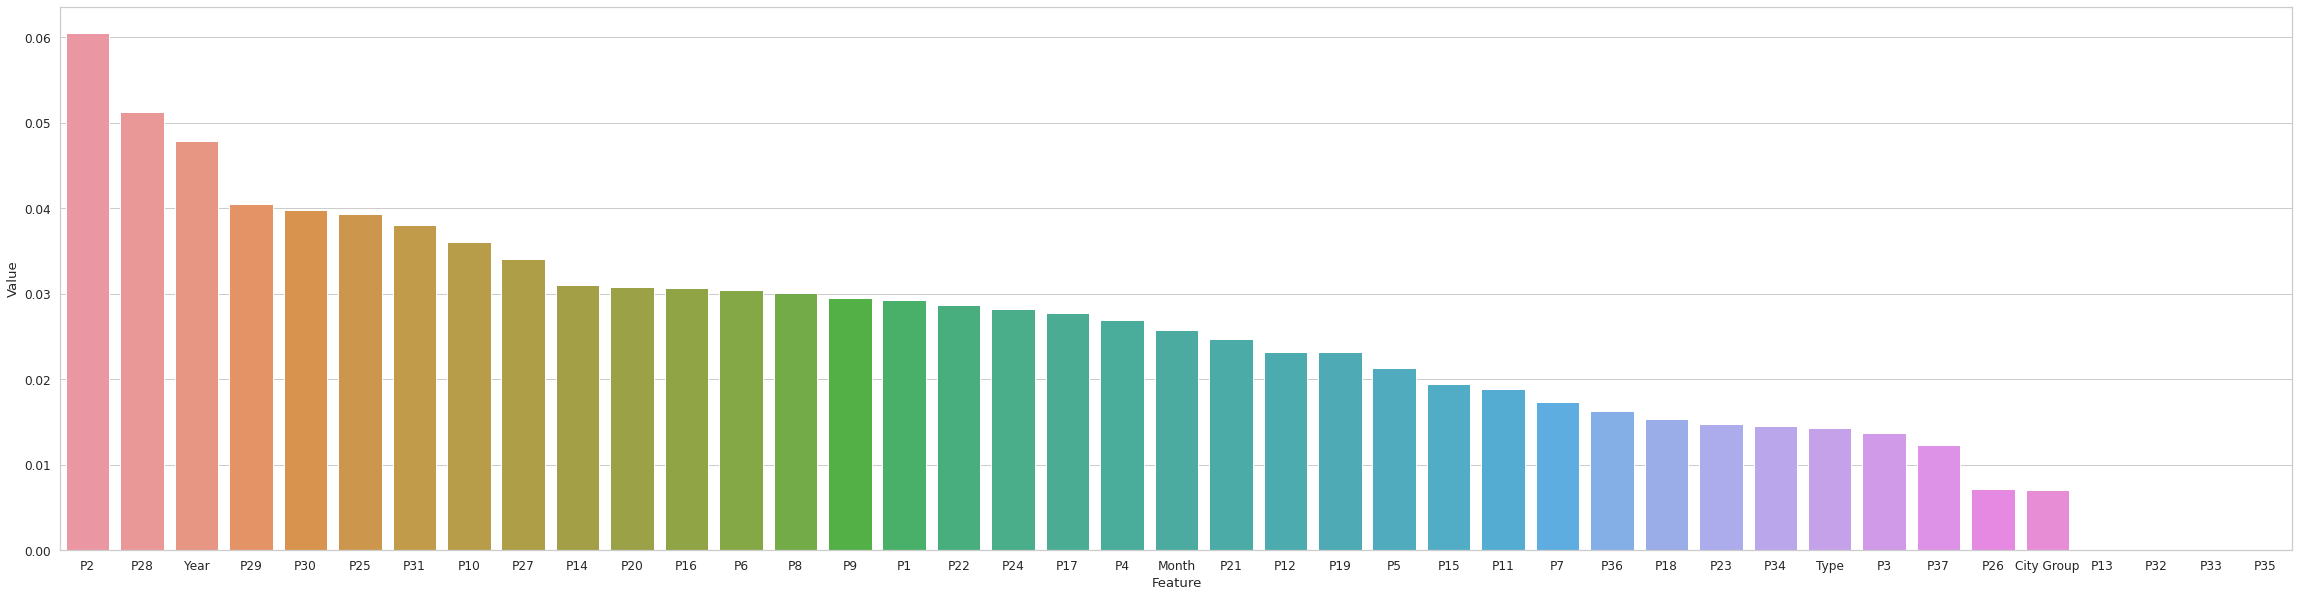

In [1253]:
f_xgb = pd.DataFrame(data={'Feature':x.columns,'Value':xgb.feature_importances_})
f_xgb = f_xgb.sort_values(['Value'],ascending=False )
plt.figure(figsize=(15,8))
sns.barplot(f_xgb['Feature'],f_xgb['Value'])
plt.gcf().set_size_inches(40,10)

The plot shows that the there are 4 variables are not important, so we want to drop them to better fit models. 

In [1254]:
df=df.drop(['P13'],axis=1)
df=df.drop(['P32'],axis=1)
df=df.drop(['P33'],axis=1)
df=df.drop(['P35'],axis=1)

#Modeling

##Train-Test Split

In [1255]:
from sklearn.model_selection import train_test_split
x1=df.drop('revenue',axis=1)
y1=df['revenue']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1256]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(102, 41)
(102,)
(26, 41)
(26,)


##Baseline Models

###Random Forest Regressor

In [1257]:
RFR = RandomForestRegressor()
RFR = RFR.fit(X_train,y_train) 

In [1258]:
pred = RFR.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("The MAE with the RF regressor is: "+str(mae))
print("The MSE with the RF regressor is: "+str(mse))
print("The R2_Score with the RF regressor is: "+str(r2))
print("The RMSE withe the RF regressor is:"+str(rmse))

The MAE with the RF regressor is: 913711.7453846154
The MSE with the RF regressor is: 1349095349956.7031
The R2_Score with the RF regressor is: 0.241789951835654
The RMSE withe the RF regressor is:1161505.6392272501


###K-Neighbors Regressor

In [1259]:
knn=KNeighborsRegressor()
knn=knn.fit(X_train,y_train)

In [1260]:
pred = knn.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("The MAE with the KNN regressor is: "+str(mae))
print("The MSE with the KNN regressor is: "+str(mse))
print("The R2_Score with the KNN regressor is: "+str(r2))
print("The RMSE withe the KNN regressor is:"+str(rmse))

The MAE with the KNN regressor is: 1171152.8000000003
The MSE with the KNN regressor is: 1802807234361.139
The R2_Score with the KNN regressor is: -0.013202335950426969
The RMSE withe the KNN regressor is:1342686.5733897614


###Lasso

In [1261]:
l = Lasso()
l=l.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.252e+13, tolerance: 2.402e+10
  model = cd_fast.enet_coordinate_descent(


In [1262]:
pred = l.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)

print("The MAE with the Lasso is: "+str(mae))
print("The MSE with the Lasso is: "+str(mse))
print("The R2_Score with the Lasso is: "+str(r2))
print("The RMSE withe the Lasso is:"+str(rmse))

The MAE with the Lasso is: 2252247.189497925
The MSE with the Lasso is: 7238794991960.511
The R2_Score with the Lasso is: -3.068301843663126
The RMSE withe the Lasso is:1342686.5733897614


###Ridge

In [1263]:
r = Ridge()
r = r.fit(X_train,y_train)

In [1264]:
pred = r.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("The MAE with the Ridge is: "+str(mae))
print("The MSE with the Ridge is: "+str(mse))
print("The R2_Score with the Ridge is: "+str(r2))
print("The RMSE withe the Lasso is:"+str(rmse))

The MAE with the Ridge is: 2003038.7538788451
The MSE with the Ridge is: 5847565587567.929
The R2_Score with the Ridge is: -2.2864118803288016
The RMSE withe the Lasso is:2418174.019289747


###XGB Regressor

In [1265]:
xgb=XGBRegressor()
xgb=xgb.fit(X_train,y_train)

[18:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1266]:
pred = xgb.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("The MAE with the XGB regressor is: "+str(mae))
print("The MSE with the XGB regressor is: "+str(mse))
print("The R2_Score with the XGB regressor is: "+str(r2))
print("The RMSE withe the XGB regressor is:"+str(rmse))

The MAE with the XGB regressor is: 1036332.1490384615
The MSE with the XGB regressor is: 1644881322806.063
The R2_Score with the XGB regressor is: 0.07555418745647313
The RMSE withe the XGB regressor is:1282529.267816553


##Comparing Models

In [1267]:
regressors = {"RandomForestRegressor": RandomForestRegressor(),
              "KNN": KNeighborsRegressor(),
              "Ridge": Ridge(),
              "Lasso": Lasso(),
              "XGBoostRegressor": XGBRegressor()}

In [1268]:
results=pd.DataFrame(columns=['MAE','MSE','R2-score','RMSE'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred),
                          np.sqrt(mean_squared_error(y_test, pred))
                         ]
results

[18:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.252e+13, tolerance: 2.402e+10
  model = cd_fast.enet_coordinate_descent(


,MAE,MSE,R2-score,RMSE
RandomForestRegressor,8.385172e+05,1.258408e+12,0.292758,1.121788e+06
KNN,1.171153e+06,1.802807e+12,-0.013202,1.342687e+06
Ridge,2.003039e+06,5.847566e+12,-2.286412,2.418174e+06
Lasso,2.252247e+06,7.238795e+12,-3.068302,2.690501e+06
XGBoostRegressor,1.036332e+06,1.644881e+12,0.075554,1.282529e+06


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


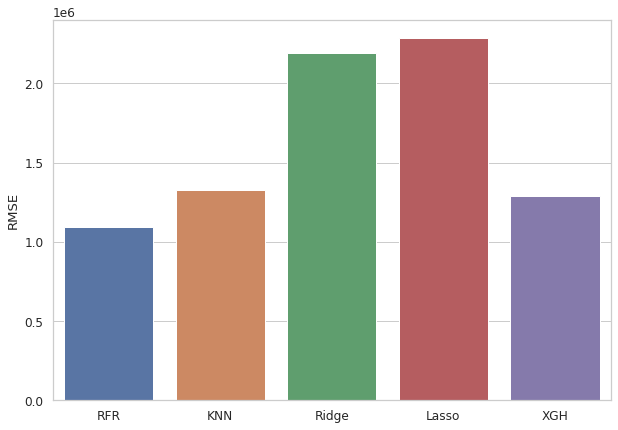

In [1269]:
fig, ax = plt.subplots(1,1,sharey=False,figsize=(10,7))
bar = sns.barplot(keys,values,ax=ax)

From all the models, Random Forest Regressor gave the minimum error, So thats the best model and should be chosen as the final model.

##Hyperparameters tuning with GridSearchCV

In [901]:
from sklearn.model_selection import GridSearchCV
params = {
    "max_depth": ["None",10, 30, 50, 75, 100],
    "max_features": ["auto",0.3, 0.6],
    "min_samples_leaf": [1,3,5,7],
    "min_samples_split": [2, 4, 8, 12],
    "n_estimators": [30, 50, 100, 200]
}

## RandomForestRegressor
RFR = RandomForestRegressor()
RFR_grid = GridSearchCV(RFR, params, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1)
RFR_grid.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
576 fits failed out of a total of 3456.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': ['None', 10, 30, 50, 75, 100],
                         'max_features': ['auto', 0.3, 0.6],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 8, 12],
                         'n_estimators': [30, 50, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [902]:
print(RFR_grid.best_score_)
print(RFR_grid.best_params_)
print(RFR_grid.best_estimator_)

-1422954.5334620455
{'max_depth': 30, 'max_features': 0.6, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}
RandomForestRegressor(max_depth=30, max_features=0.6, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=50)


##Model Performance with Best Hyperparameters

In [1270]:
RFR=RandomForestRegressor(max_depth=30, max_features=0.6, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=50)
RFR=RFR.fit(X_train,y_train)

In [1271]:
pred = RFR.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("The MAE with the RFR regressor is: "+str(mae))
print("The MSE with the RFR regressor is: "+str(mse))
print("The R2_Score with the RFR regressor is: "+str(r2))
print("The RMSE withe the RFR regressor is:"+str(rmse))

The MAE with the RFR regressor is: 964629.310433871
The MSE with the RFR regressor is: 1464390064333.9844
The R2_Score with the RFR regressor is: 0.1769927446227625
The RMSE withe the RFR regressor is:1210119.8553589575


#Submission

In [1272]:
test= pd.read_csv('/content/test.csv') 

In [1273]:
test.shape

(100000, 42)

In [1274]:
test['Open Date']=pd.to_datetime(test['Open Date'])
test['Month']=[x.month for x in test['Open Date']]
test['Year']=[x.year for x in test['Open Date']]
test['Year']=le.fit_transform(test['Year'])
test=test.drop(['Open Date'],axis=1)

In [1275]:
test['Type']=le.fit_transform(test['Type'])
test['City Group']=le.fit_transform(test['City Group'])
test=test.drop(['City'],axis=1)

In [1276]:
test=test.drop(['P13'],axis=1)
test=test.drop(['P32'],axis=1)
test=test.drop(['P33'],axis=1)
test=test.drop(['P35'],axis=1)

In [1277]:
test_id = test['Id'].tolist()
test.drop('Id',axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City Group  100000 non-null  int64  
 1   Type        100000 non-null  int64  
 2   P1          100000 non-null  int64  
 3   P2          100000 non-null  float64
 4   P3          100000 non-null  float64
 5   P4          100000 non-null  float64
 6   P5          100000 non-null  int64  
 7   P6          100000 non-null  int64  
 8   P7          100000 non-null  int64  
 9   P8          100000 non-null  int64  
 10  P9          100000 non-null  int64  
 11  P10         100000 non-null  int64  
 12  P11         100000 non-null  int64  
 13  P12         100000 non-null  int64  
 14  P14         100000 non-null  int64  
 15  P15         100000 non-null  int64  
 16  P16         100000 non-null  int64  
 17  P17         100000 non-null  int64  
 18  P18         100000 non-null  int64  
 19  P19

In [1279]:
RFR=RandomForestRegressor(max_depth=30, max_features=0.6, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=50)
RFR=RFR.fit(x1,y1)
prediction = RFR.predict(test)

In [1280]:
prediction.shape

(100000,)

In [1281]:
ID = np.arange(0,prediction.shape[0])

d = {'Id': ID, 'Prediction': prediction}
out = pd.DataFrame(d)
out.to_csv('/content/prediction.csv', 
    index = False)

#Conclusion

Our best performance model is Random Forest Regressor and our submission in Kaggle get a best score of 1880581. This high rmse is because of the transformed revenue vairable. 
To get a better model, feature selection is very important. For this project, how we work with date, how to handle City and City Group is crucial.
We tried to convert date to open days for restaurant and keep the city in our first try, but the result is not very good. I believe is because so many city vairables makes the model messy but don't give much information, and as the target of this project is to help TFI deciding when and where to open new restaurants, the open days might not helpful. Also, the dataset is very small, so how to train the data and maxmium the use of data is also the thing we consider about in the whole process.